# 3.3.7	日射熱取得量の調整について

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from io import StringIO
import japanize_matplotlib

<AxesSubplot: xlabel='ηAC', ylabel='窓面積比率'>

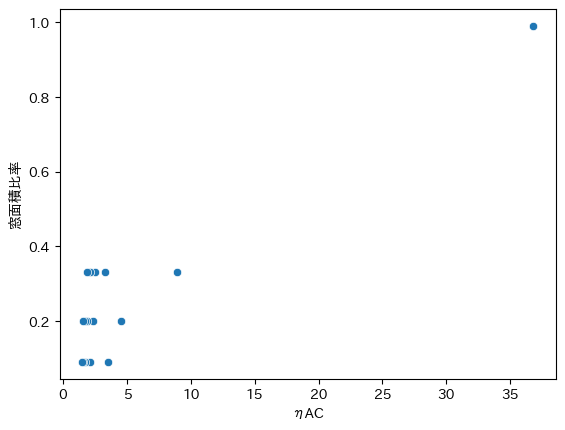

In [3]:
# 住戸位置,断熱等級ごとの6地域における基準値
data = """窓面積比率,住戸位置,等級,UA,ηAC,ηAH
0.09,中間階中住戸,無断熱,0.746669615,3.504333981,1.379094077
0.09,中間階中住戸,等級4,0.293795133,2.120169613,0.71031559
0.09,中間階中住戸,等級5,0.216011167,1.704585617,0.569089065
0.09,中間階中住戸,等級6,0.15107273,1.553862358,0.509393233
0.09,中間階中住戸,等級7,0.102244289,1.493177013,0.465445124
0.20,中間階妻住戸,無断熱,1.328805102,4.539487305,2.376641448
0.20,中間階妻住戸,等級4,0.425928246,2.355128714,0.936738893
0.20,中間階妻住戸,等級5,0.31136496,1.874143731,0.732487324
0.20,中間階妻住戸,等級6,0.230080159,1.694353367,0.644780362
0.20,中間階妻住戸,等級7,0.137661412,1.556155741,0.526135906
0.33,最上階妻住戸,無断熱,2.625291001,8.94753936,6.784693503
0.33,最上階妻住戸,等級4,0.701820445,3.293162192,1.87477237
0.33,最上階妻住戸,等級5,0.491420922,2.486334001,1.344677594
0.33,最上階妻住戸,等級6,0.360765937,2.138685014,1.089112009
0.33,最上階妻住戸,等級7,0.230593522,1.872124913,0.842105077
0.99,最悪値,無断熱,3.822449698,36.7851641,18.66681945
"""

# 文字列データをStringIOオブジェクトに変換
data_io = StringIO(data)

# ロジスティック曲線の推定に使用する各点を読み込み
df = pd.read_csv(data_io)
sns.scatterplot(df, x='ηAC', y='窓面積比率')

In [ ]:
def logistic_fit(x, a, b):
    return 1 / (1 + np.exp(-a * (x + b)))

# ロジスティック曲線にフィッティング
# ※それっぽい曲線にフィッティングできるように、パラメータa,bの初期値と範囲を指定する
param, cov = curve_fit(logistic_fit, df['ηAC'], df['窓面積比率'], p0=(1.0, -1.0), bounds=([0.0, -np.inf], [np.inf, 0]))
print(param)


[  0.12852127 -13.35408535]


<AxesSubplot: xlabel='ηAC', ylabel='窓面積比率'>

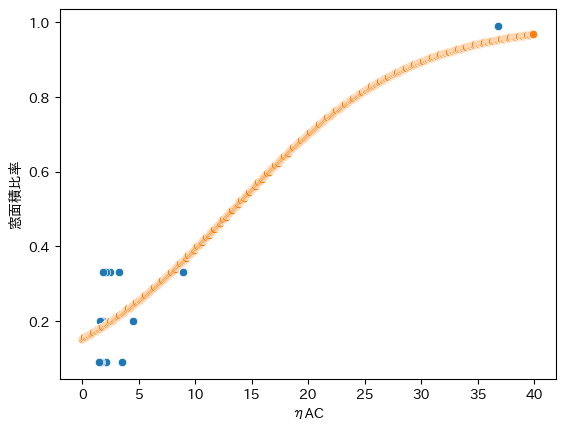

In [ ]:
# ロジスティック曲線の推定に使用した各点をプロット
sns.scatterplot(x=df['ηAC'], y=df['窓面積比率'])

# 0≦ηAC≦40 の範囲で、推定したロジスティック曲線をプロット
array_x = np.arange(0, 40, 0.1)
array_y_fit = logistic_fit(array_x, param[0], param[1])
sns.scatterplot(x=array_x, y=array_y_fit, markers='')